

### **ANÁLISIS DEL MERCADO INMOBILIARIO**          

El objetivo de este Proyecto es analizar los datos del mercado inmobilario a partir de una serie de datos de la Inmobilaria Properati.

Para realizar este proyecto realizaremos en primer lugar un análisis detallado del dataset, filtraremos los datos y aplicaremos herramientas avanzadas en el procesiamiento de datos (como OneHotEnconding, PCA Y Clustering); para luego en el próximo proyecto desarrollemos modelos avanzados de Maching Learning para realizar las predicciones de los precios de los inmuebles.

In [1]:
import pandas as pd

## 1. Análisis de Dataset

In [3]:
#CARGAMOS EL DATAS
data=pd.read_excel('C:\\Users\\Personal\\Documents\\python\\Datos_Properati.xlsx')


In [5]:
#ANALIZAMOS EL DATASET
print(data.shape) #cantidad de filas y columnas
print(data.columns) #nombre de las columnas
print(data.dtypes)

(459182, 20)
Index(['ID', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'l2', 'l3', 'place_l4', 'place_l5', 'place_l6', 'operation',
       'property_type', 'rooms', 'bedrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title"'],
      dtype='object')
ID                         object
start_date         datetime64[ns]
end_date                   object
created_on         datetime64[ns]
latitud                   float64
longitud                  float64
l2                         object
l3                         object
place_l4                   object
place_l5                   object
place_l6                   object
operation                  object
property_type              object
rooms                     float64
bedrooms                  float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title"                     object
dtype: object


In [6]:
#TIPOS DE PROPIEDAD: analizamos tipo de propiedad y cantidad de instancias por cada tipo
print(data.groupby("property_type").size())

property_type
Casa               120436
Casa de campo         865
Cochera              4109
Departamento       231069
DepÃ³sito            4049
Local comercial     20537
Lote                28463
Oficina             16062
Otro                 7694
PH                  25898
dtype: int64


In [7]:
#TIPOS DE OPERACION: analizamos tipo de operación y cantidad de instancias por cada tipo
print(data.groupby("operation").size())

operation
Alquiler              98784
Alquiler temporal     23299
Venta                337099
dtype: int64


In [8]:
#UBICACION: analizamos ubicación de la propiedad y cantidad de instancias por cada ubicación
print(data.groupby("l2").size())

l2
Bs.As. G.B.A. Zona Norte          89411
Bs.As. G.B.A. Zona Oeste          28344
Bs.As. G.B.A. Zona Sur            47628
Buenos Aires Costa AtlÃ¡ntica     12446
Buenos Aires Interior              6260
California                            1
Canelones                           744
Capital Federal                  157367
Catamarca                             7
Chaco                               208
Chubut                              699
Colonia                            2299
Corrientes                          297
CÃ³rdoba                          22514
Entre RÃ­os                        1213
Florida                             411
Formosa                               2
Jujuy                               406
La Pampa                            782
La Rioja                              4
Maldonado                          5538
Maryland                              8
Mendoza                            5390
Miami                                 4
Michigan                            2

## 2. Filtro del dataset
Filtramos el dataset para analizar solo los inmuebles ubicados en Capital Federal y en la zona norte del Gran Buenos Aires. Además analizamos la distribucion de los datos mediante una matriz de doble filtro.

In [ ]:
# filtro el dataset dejando solo propiedad de Capital Federal y de zona norte del Gran Buenos Aires
data2=data[data.l2.str.contains("Capital Federal|Bs.As. G.B.A. Zona Norte")].reset_index()
# filas y columnas del dataset filtrado
print(data2.shape)

Analizamos las principales columnas del dataset con un matriz de doble filtro que nos indica cantidad de valores por ubicación según otra columna de valores, como pueden ser localidad, tipo de propiedad, tipo de operación, tipo de moneda.-- ( en la celda siguiente, si cambiamos el valor de "c" y "nombre_c" según la posibilidades expuestas en las referencias se pueden analizar los distintas columnas)

In [ ]:
#Analizamos las principales columnas del dataset con un matriz de doble filtro
c="operation"  # valores posibles para columna:"property_type","operation", "currency","l3"
nombre_c="Tipo de Operación"  # valores posibles para nombre.columna: "Tipo de Propiedad", "Tipo de operación", "Moneda","Ubicacion"
data_filtro1=matriz_doble_filtro(data2,c,nombre_c)
print(tabulate(data_filtro1, headers='keys', tablefmt='fancy_grid'))

Según la distribución de valores analizadas para anteriormente, filtramos el dataset para quedarnos solo con propiedad en dólares y eliminas las filas que no contengan localidad definida, para que nos queden un dataset homogeneo para poder realizar un análisis comparativo (se podria realiza una función traspaso de USD  a  ARG; pero al no contar con el momento de referencia de los datos si aplicamos cualquier tipo de cambio se desvirtuará la relación entre los datos) (se define eliminar los datos con localidad no definida debido a que son pocos y que la localidad tiene gran importancia en el análisis de las propiedades.
Ademas eliminamos posibles datos con valores negativos de habientes, habitaciones, superficie o precio ya que resultan inconsistentes

In [272]:
data4= data2.query('currency == "USD"')
print(data4.shape)
cc='""""""""'
for i in range(0,len(data4.index)):
  if data4.iloc[i,8]==cc:
    data4.iloc[i,8]="nulo"
data5= data4.query('l3 != "nulo"')
print(data5.shape)
data6= data5.query('rooms>=0 & price>=0')
print(data6.shape)

(191934, 21)
(189136, 21)
(161952, 21)


Analizamos los valores faltantes y los outliers del dataset

In [14]:
#ANALIZAMOS OUTLIERES, PARA ELLO PRIMEROS GRAFICAMOS LA DISTRIBUCIÓN DE LAS VARIABLES.

Text(0.5, 0, 'Cantidad de habitaciones')

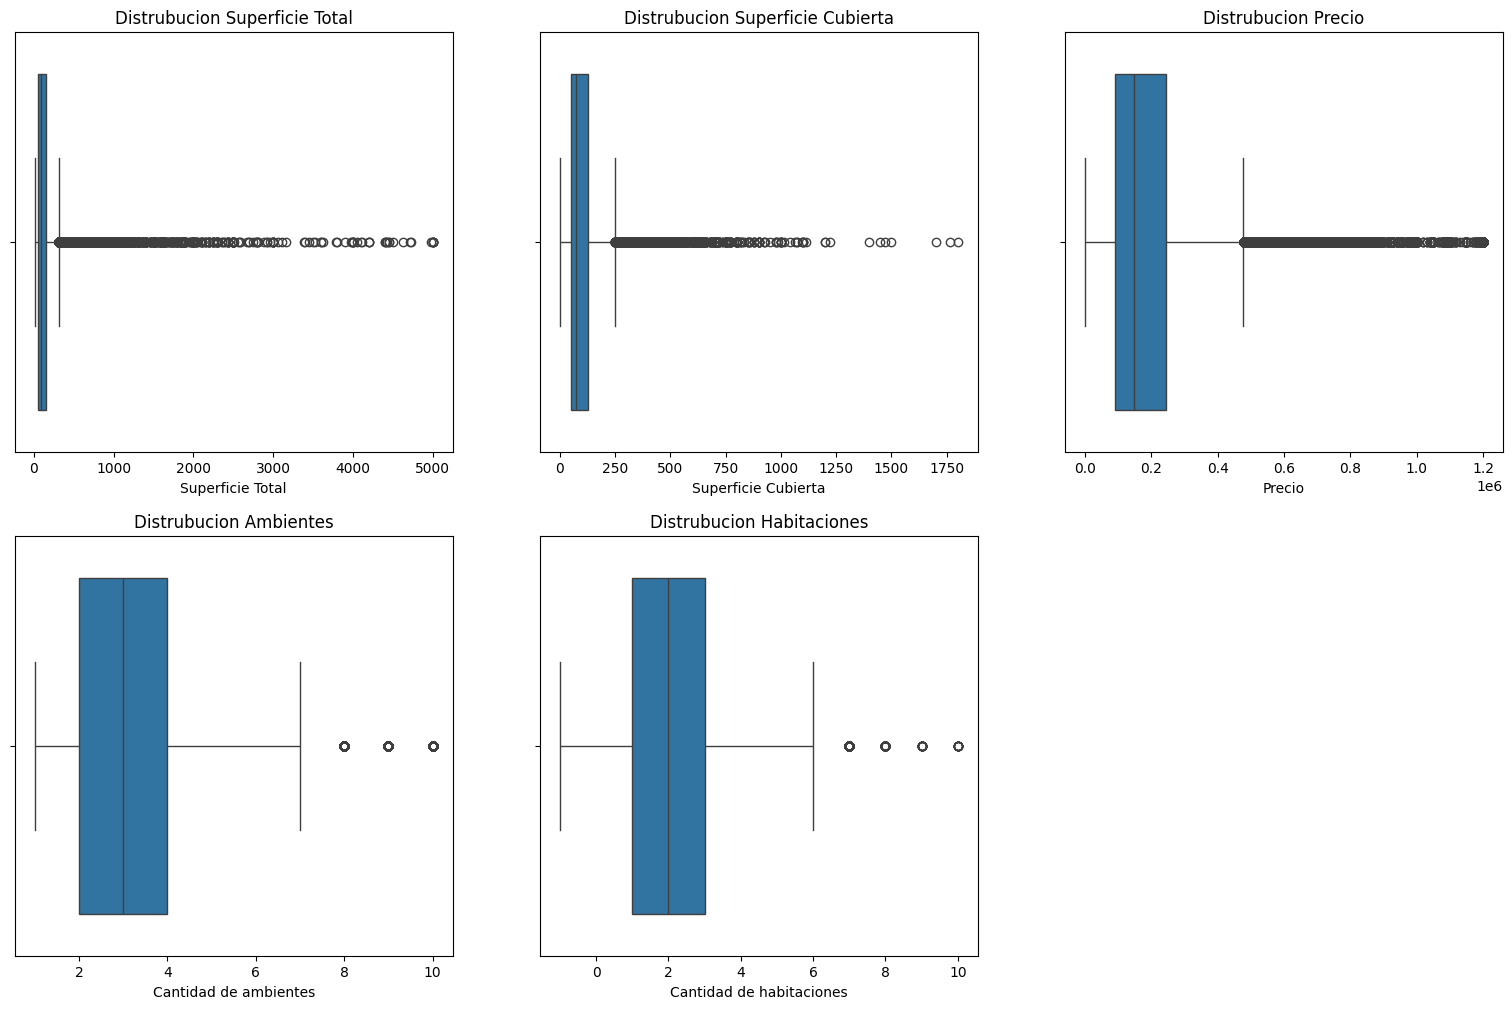

In [278]:
#@title
# graficamos la distribución de las variables, sacando los valores outliers y dejando solo las instancias inluidas en el rango intercuartil

plt.figure(figsize=(6.4*3,6*2))
plt.subplot(2,3,1)
sns.boxplot(data = data7, x = "surface_total")
plt.title("Distrubucion Superficie Total")
plt.xlabel("Superficie Total")


plt.subplot(2,3,2)
sns.boxplot(data = data7, x = "surface_covered" )
plt.title("Distrubucion Superficie Cubierta")
plt.xlabel("Superficie Cubierta")

plt.subplot(2,3,3)
sns.boxplot(data = data7, x = "price")
plt.title("Distrubucion Precio")
plt.xlabel("Precio")


plt.subplot(2,3,4)
sns.boxplot(data = data7, x = "rooms")
plt.title("Distrubucion Ambientes")
plt.xlabel("Cantidad de ambientes")


plt.subplot(2,3,5)
sns.boxplot(data = data7, x = "bedrooms")
plt.title("Distrubucion Habitaciones")
plt.xlabel("Cantidad de habitaciones")


In [285]:
#filtramos los ouliers
data7= data6.query('rooms<=10 & bedrooms<=10 & surface_total<=4000 & surface_covered<=1500 & price<=1200000 & latitud!=1')
print(data7.shape)
print(data7.columns)

(113989, 21)
Index(['index', 'ID', 'start_date', 'end_date', 'created_on', 'latitud',
       'longitud', 'l2', 'l3', 'place_l4', 'place_l5', 'place_l6', 'operation',
       'property_type', 'rooms', 'bedrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title"'],
      dtype='object')


In [286]:
# DESCARTAMOS COLUMNAS QUE NO UTILIZAREMOS
data7 = data7.rename(columns={'title"':'title'})
data8= data7.drop(columns=['start_date', 'end_date', 'created_on','place_l4','place_l5','place_l6', 'title','currency','operation'],axis=1)
print(data8.shape)
data9= data8.drop(columns=['ID'],axis=1)
print(data9.shape)

(113989, 12)
(113989, 11)


## 3. Nos realizamos algunas preuntas sobre el dataset filtrado
pregunta1: ¿Cuales son las localidades en los cuales hay mas propiedades disponibles?

l3
Villa Urquiza      3790
Escobar            5310
San Isidro         5448
Recoleta           5708
Vicente LÃ³pez     5977
Caballito          6148
Belgrano           7684
Pilar              7975
Tigre             11801
Palermo           12422
dtype: int64
10


Text(0.5, 0, 'Localidades')

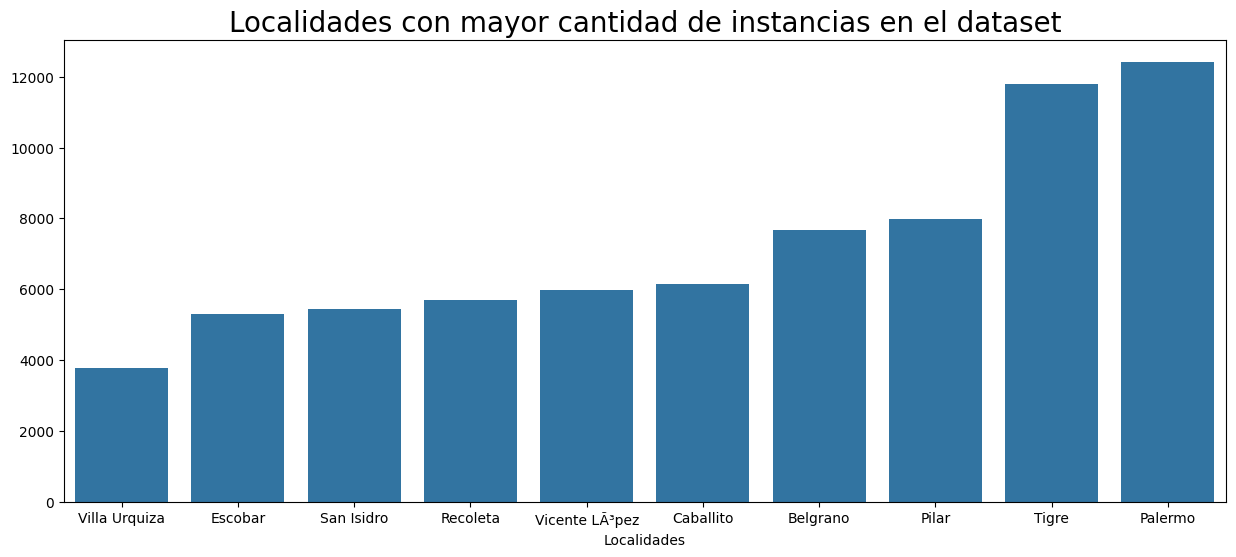

In [16]:
Barriosprop=data7.pivot_table(index=['l3'], aggfunc='size').sort_values(ascending=True)
Barriosprop=Barriosprop[Barriosprop>3500]
print(Barriosprop)
print(Barriosprop.size)
plt.figure(figsize=(15,6))
sns.barplot(x=Barriosprop.index, y=Barriosprop.values)
plt.title("Localidades con mayor cantidad de instancias en el dataset", size=20)
plt.xlabel("Localidades")

PREGUNTA 2. ¿Cuales son las 10 localidades mas caras, y cuales son las 10 localidades mas baratas,

Text(0, 0.5, 'Localidades')

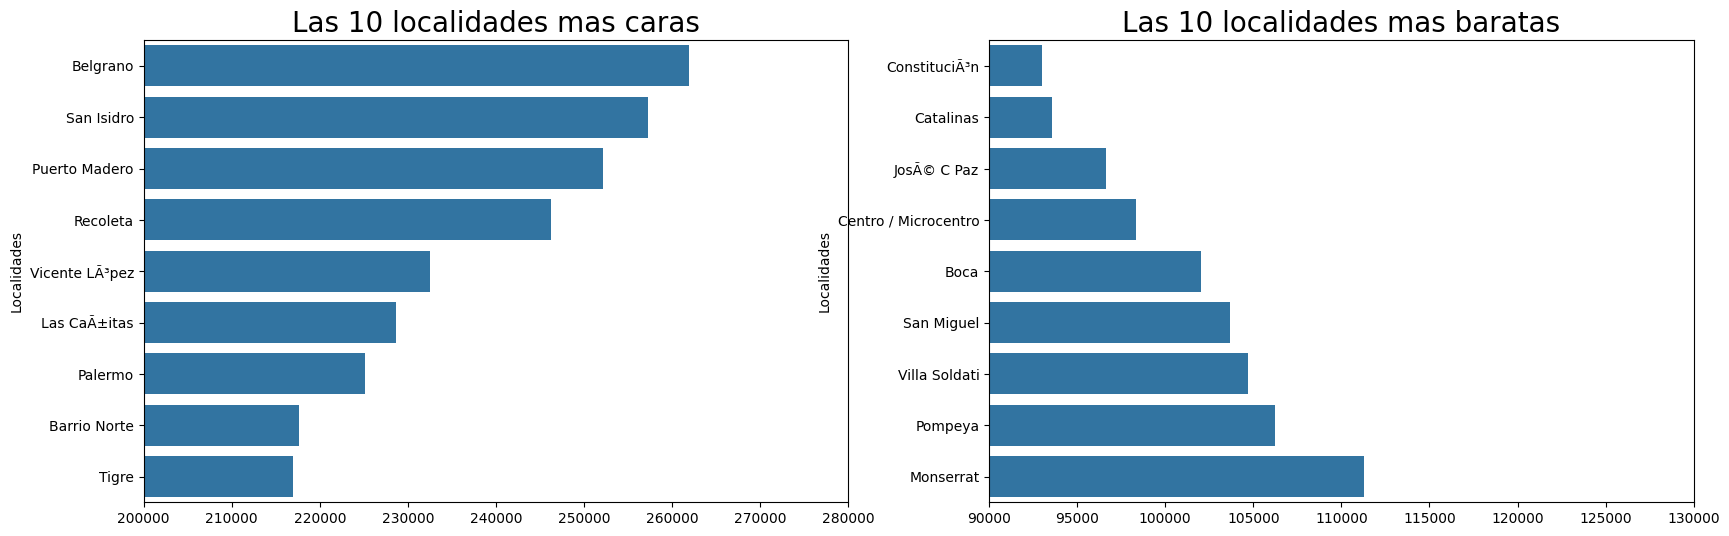

In [17]:
barrios_caros= pd.pivot_table(data8, index=["l3"], aggfunc= { 'price': 'mean'})
barrios_caros=barrios_caros.sort_values("price",ascending=False)
barrios_caros=barrios_caros.iloc[:9,:]

barrios_baratos= pd.pivot_table(data8, index=["l3"], aggfunc= { 'price': 'mean'})
barrios_baratos=barrios_baratos.sort_values("price",ascending=True)
barrios_baratos=barrios_baratos.iloc[:9,:]

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(y=barrios_caros.index, x=barrios_caros.price.values)
plt.xlim(200000,280000)
plt.title("Las 10 localidades mas caras", size=20)
plt.ylabel("Localidades")

plt.subplot(1,2,2)
sns.barplot(y=barrios_baratos.index, x=barrios_baratos.price.values)
plt.xlim(90000,130000)
plt.title("Las 10 localidades mas baratas", size=20)
plt.ylabel("Localidades")

PREGUNTA 3. ¿En que barrios puedo encontrar propiedad con las siguientes carateristicas: precio entre 180000 y 240000, 3 baños, 3 habitaciones, 6 ambientes?

In [18]:
busqueda= data8.query('property_type=="Departamento" & rooms==6 & bedrooms==3 & price>180000 & price<240000')
busqueda.groupby("l3").size()

l3
Congreso      1
Monserrat     4
San Telmo     1
Tribunales    2
dtype: int64

PREGUNTA 3. ¿Cuales son las caracteristicas del index 53?

In [31]:
busqueda= data8.query('index==53')
print(busqueda.head())

    index                           ID    latitud   longitud               l2  \
19     53  """3XhGN1xIqtzxywrDb3vC/w== -34.623886 -58.412746  Capital Federal   

       l3 operation property_type  rooms  bedrooms  surface_total  \
19  Boedo     Venta            PH    2.0       1.0           61.0   

    surface_covered     price currency  
19             46.0  100000.0      USD  


##4. Correlación de Variables

In [287]:
# HACEMOS  One-Hot Encoding CON LAS VARIABLES CATEGORICAS
data_1 = pd.get_dummies(data8, columns=["l2","l3","property_type"])
data_1.shape

(113989, 88)

Luego de realizar el One-Hot Encoding nos quedó un dataset de 90 columnas, por lo que utilizaremos PCA para reducir su tamaño. Pero el PCA lo haremos en tres etapas; primero lo haremos sobre las variables que definen ubicación (l2 y l3), luego lo haremos en las variables que definen tipo de propiedad; y en tercer lugar concatenaremos esos dos PCA al dataset base (el data set sin variables pasadas por One-Hot Encoding.)  

In [288]:
# RESETEMOS EL INDICE LUEGO DE QUE FILTRAMOS EL DATA SET
data_2=data_1.reset_index()
data_2.drop(columns='index', inplace=True)
data_2.columns

Index(['level_0', 'ID', 'latitud', 'longitud', 'rooms', 'bedrooms',
       'surface_total', 'surface_covered', 'price',
       'l2_Bs.As. G.B.A. Zona Norte', 'l2_Capital Federal', 'l3_Abasto',
       'l3_AgronomÃ­a', 'l3_Almagro', 'l3_Balvanera', 'l3_Barracas',
       'l3_Barrio Norte', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo', 'l3_Caballito',
       'l3_Catalinas', 'l3_Centro / Microcentro', 'l3_Chacarita', 'l3_Coghlan',
       'l3_Colegiales', 'l3_Congreso', 'l3_ConstituciÃ³n', 'l3_Escobar',
       'l3_Flores', 'l3_Floresta', 'l3_General San MartÃ­n', 'l3_JosÃ© C Paz',
       'l3_Las CaÃ±itas', 'l3_Liniers', 'l3_Malvinas Argentinas',
       'l3_Mataderos', 'l3_Monserrat', 'l3_Monte Castro', 'l3_NuÃ±ez',
       'l3_Once', 'l3_Palermo', 'l3_Parque Avellaneda', 'l3_Parque Centenario',
       'l3_Parque Chacabuco', 'l3_Parque Chas', 'l3_Parque Patricios',
       'l3_Paternal', 'l3_Pilar', 'l3_Pompeya', 'l3_Puerto Madero',
       'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra', 'l3_San Cristobal',


In [289]:
#Definimos data_base, el dataset sin las varibles en que se utilizo One-hot Encoding
data_base = data_2[['latitud','longitud','rooms', 'bedrooms', 'surface_total', 'surface_covered', 'price']]
print(data_base.shape)

(113989, 7)


In [290]:
# Definimos un dataset con las variables pasadas por One-hot Enconding que definen ubicacion
ubicacion = data_2.drop(columns=['level_0', 'ID','latitud', 'longitud','rooms', 'bedrooms', 'surface_total',
       'surface_covered', 'price', 'property_type_Casa', 'property_type_Casa de campo',
       'property_type_Cochera', 'property_type_Departamento',
       'property_type_DepÃ³sito', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH'])

In [291]:
# REDUCIMOS DIMENSIONALIDAD EN VARIABLES QUE DEFINEN UBICACION
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_ubicacion = pca.fit_transform(ubicacion)
print(pca.explained_variance_ratio_.sum())
print(X_ubicacion.shape)
data_ubicacion = pd.DataFrame(X_ubicacion, columns=['ubi1','ubi2','ubi3','ubi4','ubi5','ubi6','ubi7','ubi8','ubi9','ubi10','ubi11','ubi12','ubi13','ubi14','ubi15','ubi16','ubi17','ubi18','ubi19','ubi20'])
print(data_ubicacion.shape)
print(data_ubicacion.columns)

0.8397533483627495
(113989, 20)
(113989, 20)
Index(['ubi1', 'ubi2', 'ubi3', 'ubi4', 'ubi5', 'ubi6', 'ubi7', 'ubi8', 'ubi9',
       'ubi10', 'ubi11', 'ubi12', 'ubi13', 'ubi14', 'ubi15', 'ubi16', 'ubi17',
       'ubi18', 'ubi19', 'ubi20'],
      dtype='object')


In [292]:
# Definimos un dataset con las variables pasadas por One-hot Enconding que definen tipo de propiedad
tipo = data_2[['property_type_Cochera', 'property_type_Departamento',
       'property_type_DepÃ³sito', 'property_type_Local comercial',
       'property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
       'property_type_PH']]

In [293]:
# REDUCIMOS DIMENSIONALIDAD EN VARIABLES QUE DEFINEN TIPO DE PROPIEDAD
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tipo = pca.fit_transform(tipo)
print(pca.explained_variance_ratio_.sum())
print(X_tipo.shape)
data_tipo = pd.DataFrame(X_tipo, columns=['tipo1', 'tipo2'])
print(data_tipo.shape)
print(data_tipo.columns)

0.9534072786673883
(113989, 2)
(113989, 2)
Index(['tipo1', 'tipo2'], dtype='object')


In [294]:
print(data_base.shape, data_ubicacion.shape, data_tipo.shape)

(113989, 7) (113989, 20) (113989, 2)


In [295]:
# CONCATENAMOS LOS DATASET BASE, UBICACION Y TIPO
data_concat= pd.concat([data_base, data_ubicacion], axis=1, join="inner")
data_nueva=pd.concat([data_concat, data_tipo], axis=1, join="inner")
print(data_base.shape, data_concat.shape, data_nueva.shape)


(113989, 7) (113989, 27) (113989, 29)


In [296]:
data_nueva.columns

Index(['latitud', 'longitud', 'rooms', 'bedrooms', 'surface_total',
       'surface_covered', 'price', 'ubi1', 'ubi2', 'ubi3', 'ubi4', 'ubi5',
       'ubi6', 'ubi7', 'ubi8', 'ubi9', 'ubi10', 'ubi11', 'ubi12', 'ubi13',
       'ubi14', 'ubi15', 'ubi16', 'ubi17', 'ubi18', 'ubi19', 'ubi20', 'tipo1',
       'tipo2'],
      dtype='object')

Luego de la reducción de dimensionalidad con PCA nos quedo un dataset de 30  columnas

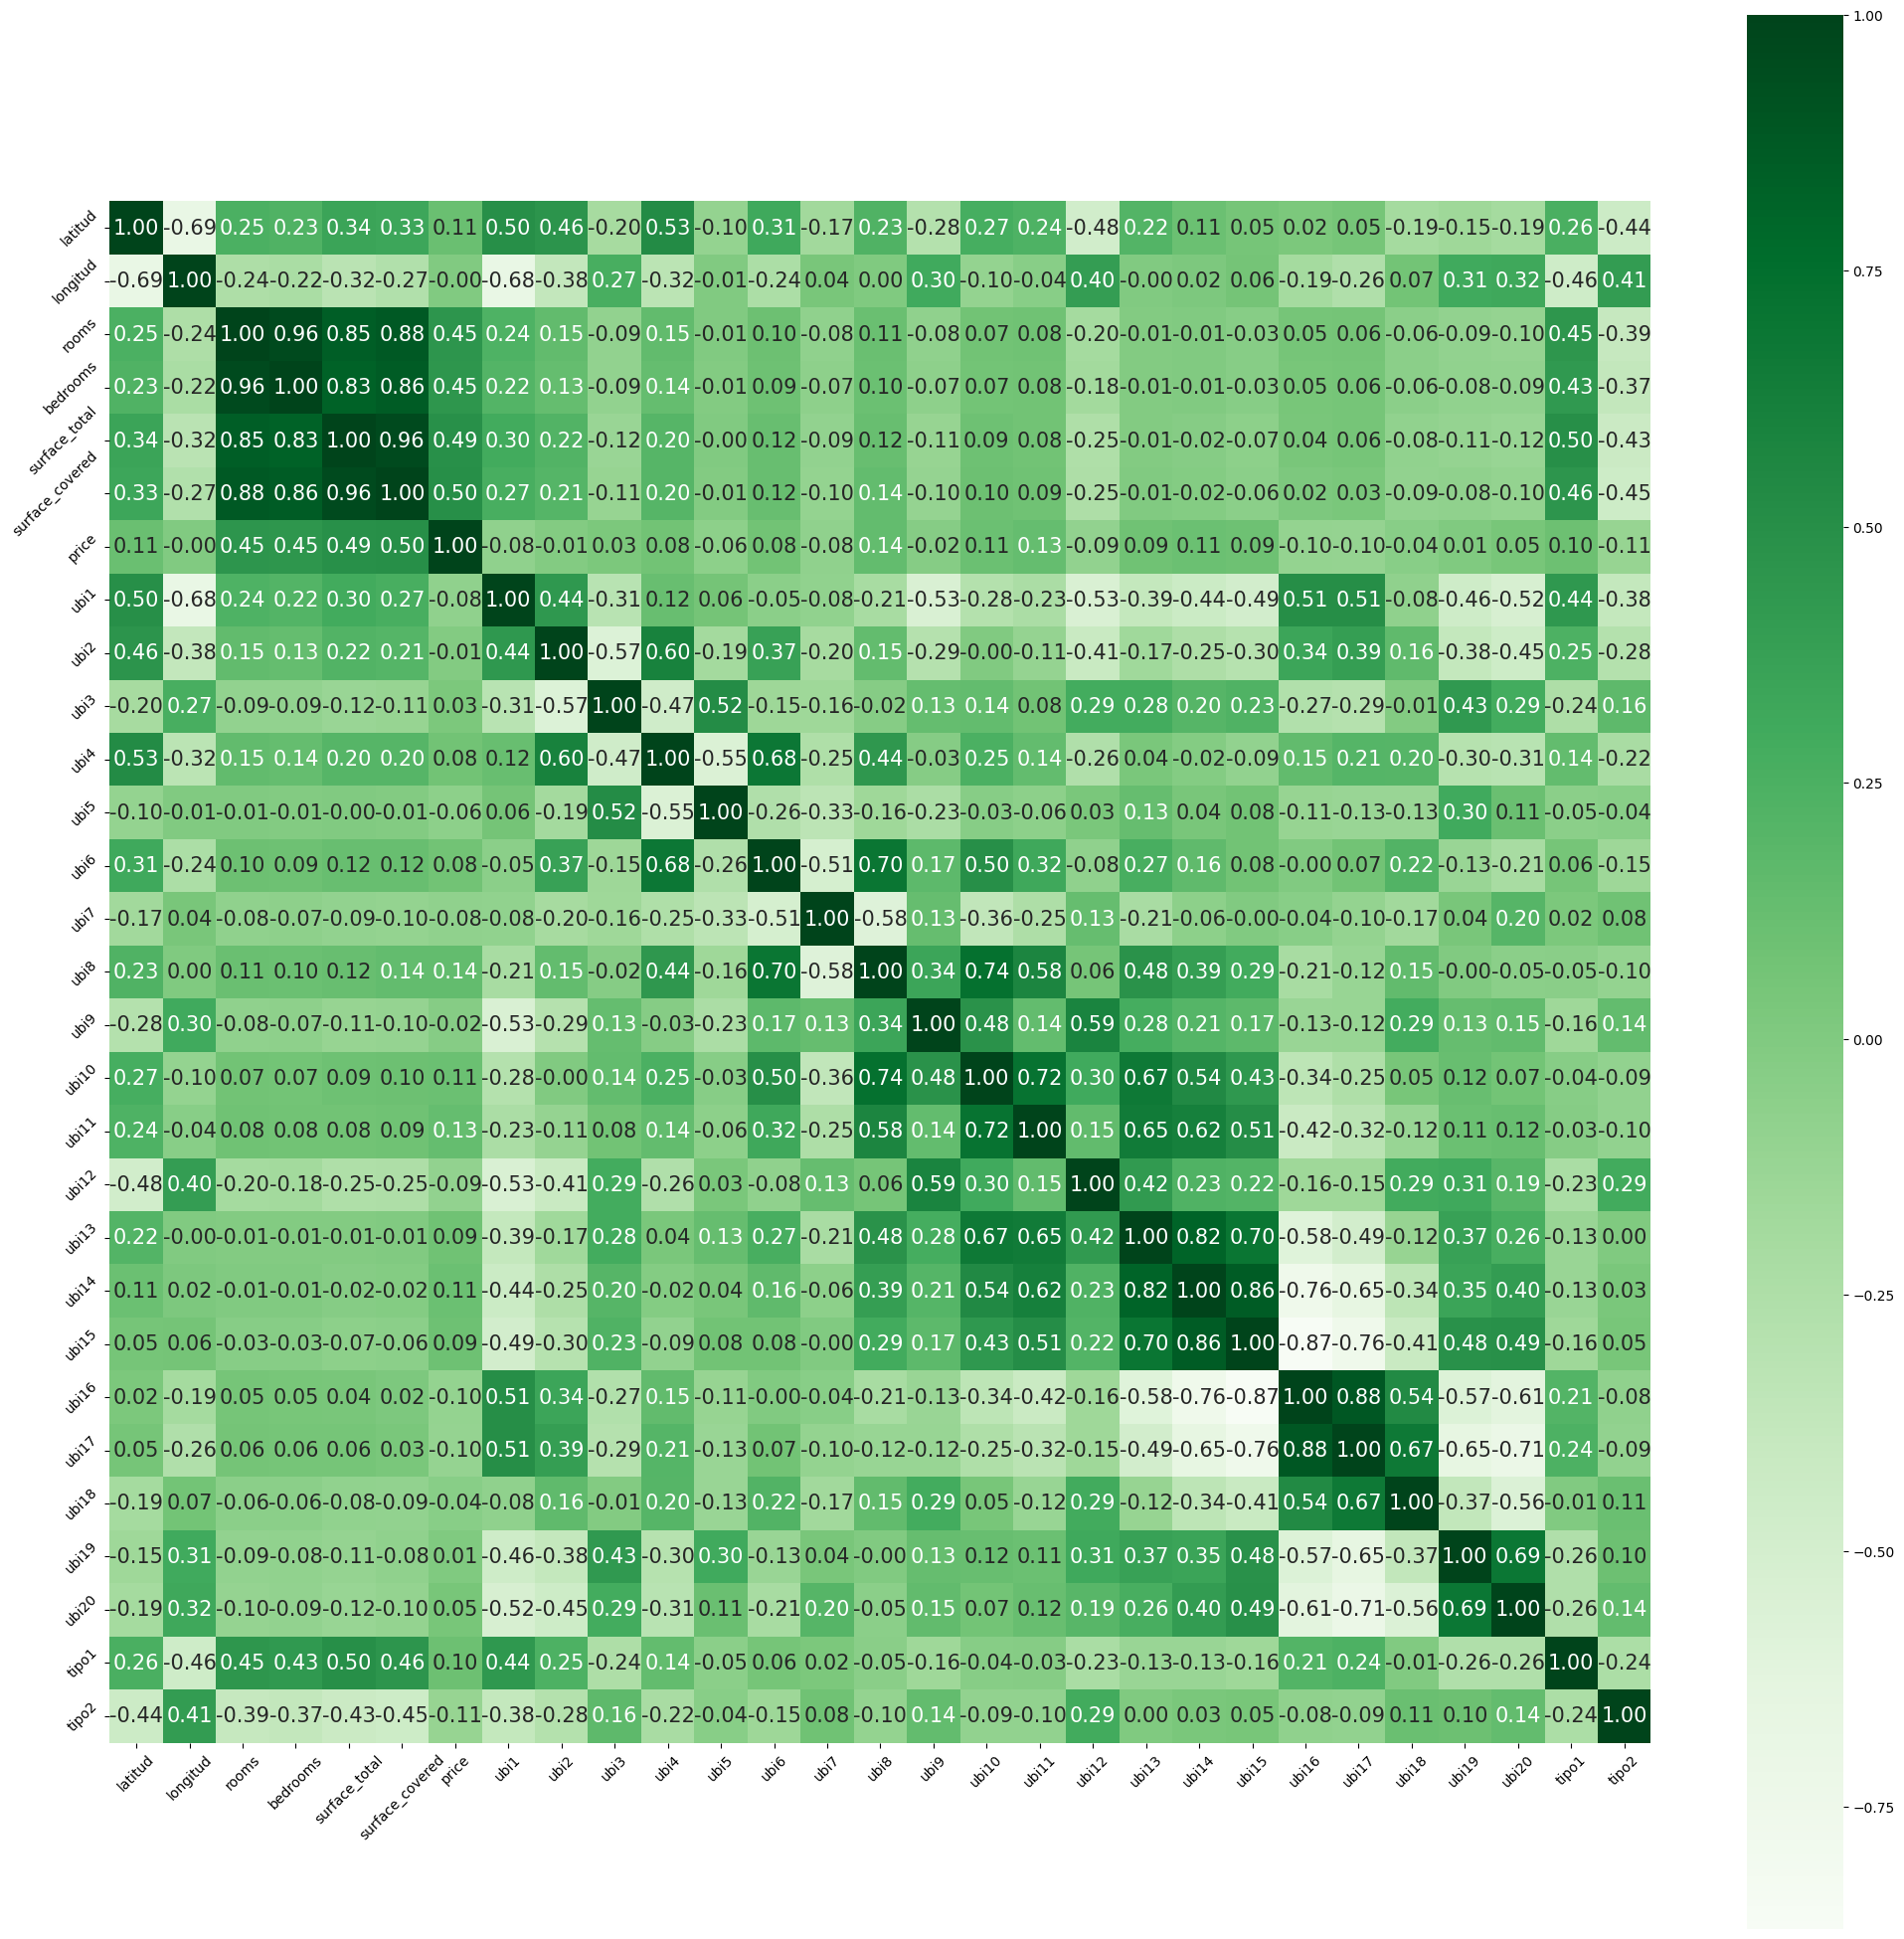

In [245]:
# ANALIZAMOS LA CORRELACION LINEAL ENTRE VARIABLES
corr = data_nueva.corr('spearman')
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_nueva.columns,
           yticklabels= data_nueva.columns,
           cmap= 'Greens')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

A parti del Heatmap podemos ver que la variable precio esta correlacionada linealmente con las variables rooms, bedrooms, bathrooms, surface_total y surface_covered; pero no esta correlacionada con las variables ubi, tipo1 y tipo2.

Pero la variables ubi estan correlacionadas entre si y a su vez la variable ubi1 esta correlacionada con variable tipo 1, y esta ultima con superficie cubierta, que es la variable mas correlacionada con el precio.  

In [246]:
data_pairplot= data_nueva[['rooms', 'bedrooms', 'surface_total', 'surface_covered',
       'price', 'ubi1','tipo1']]

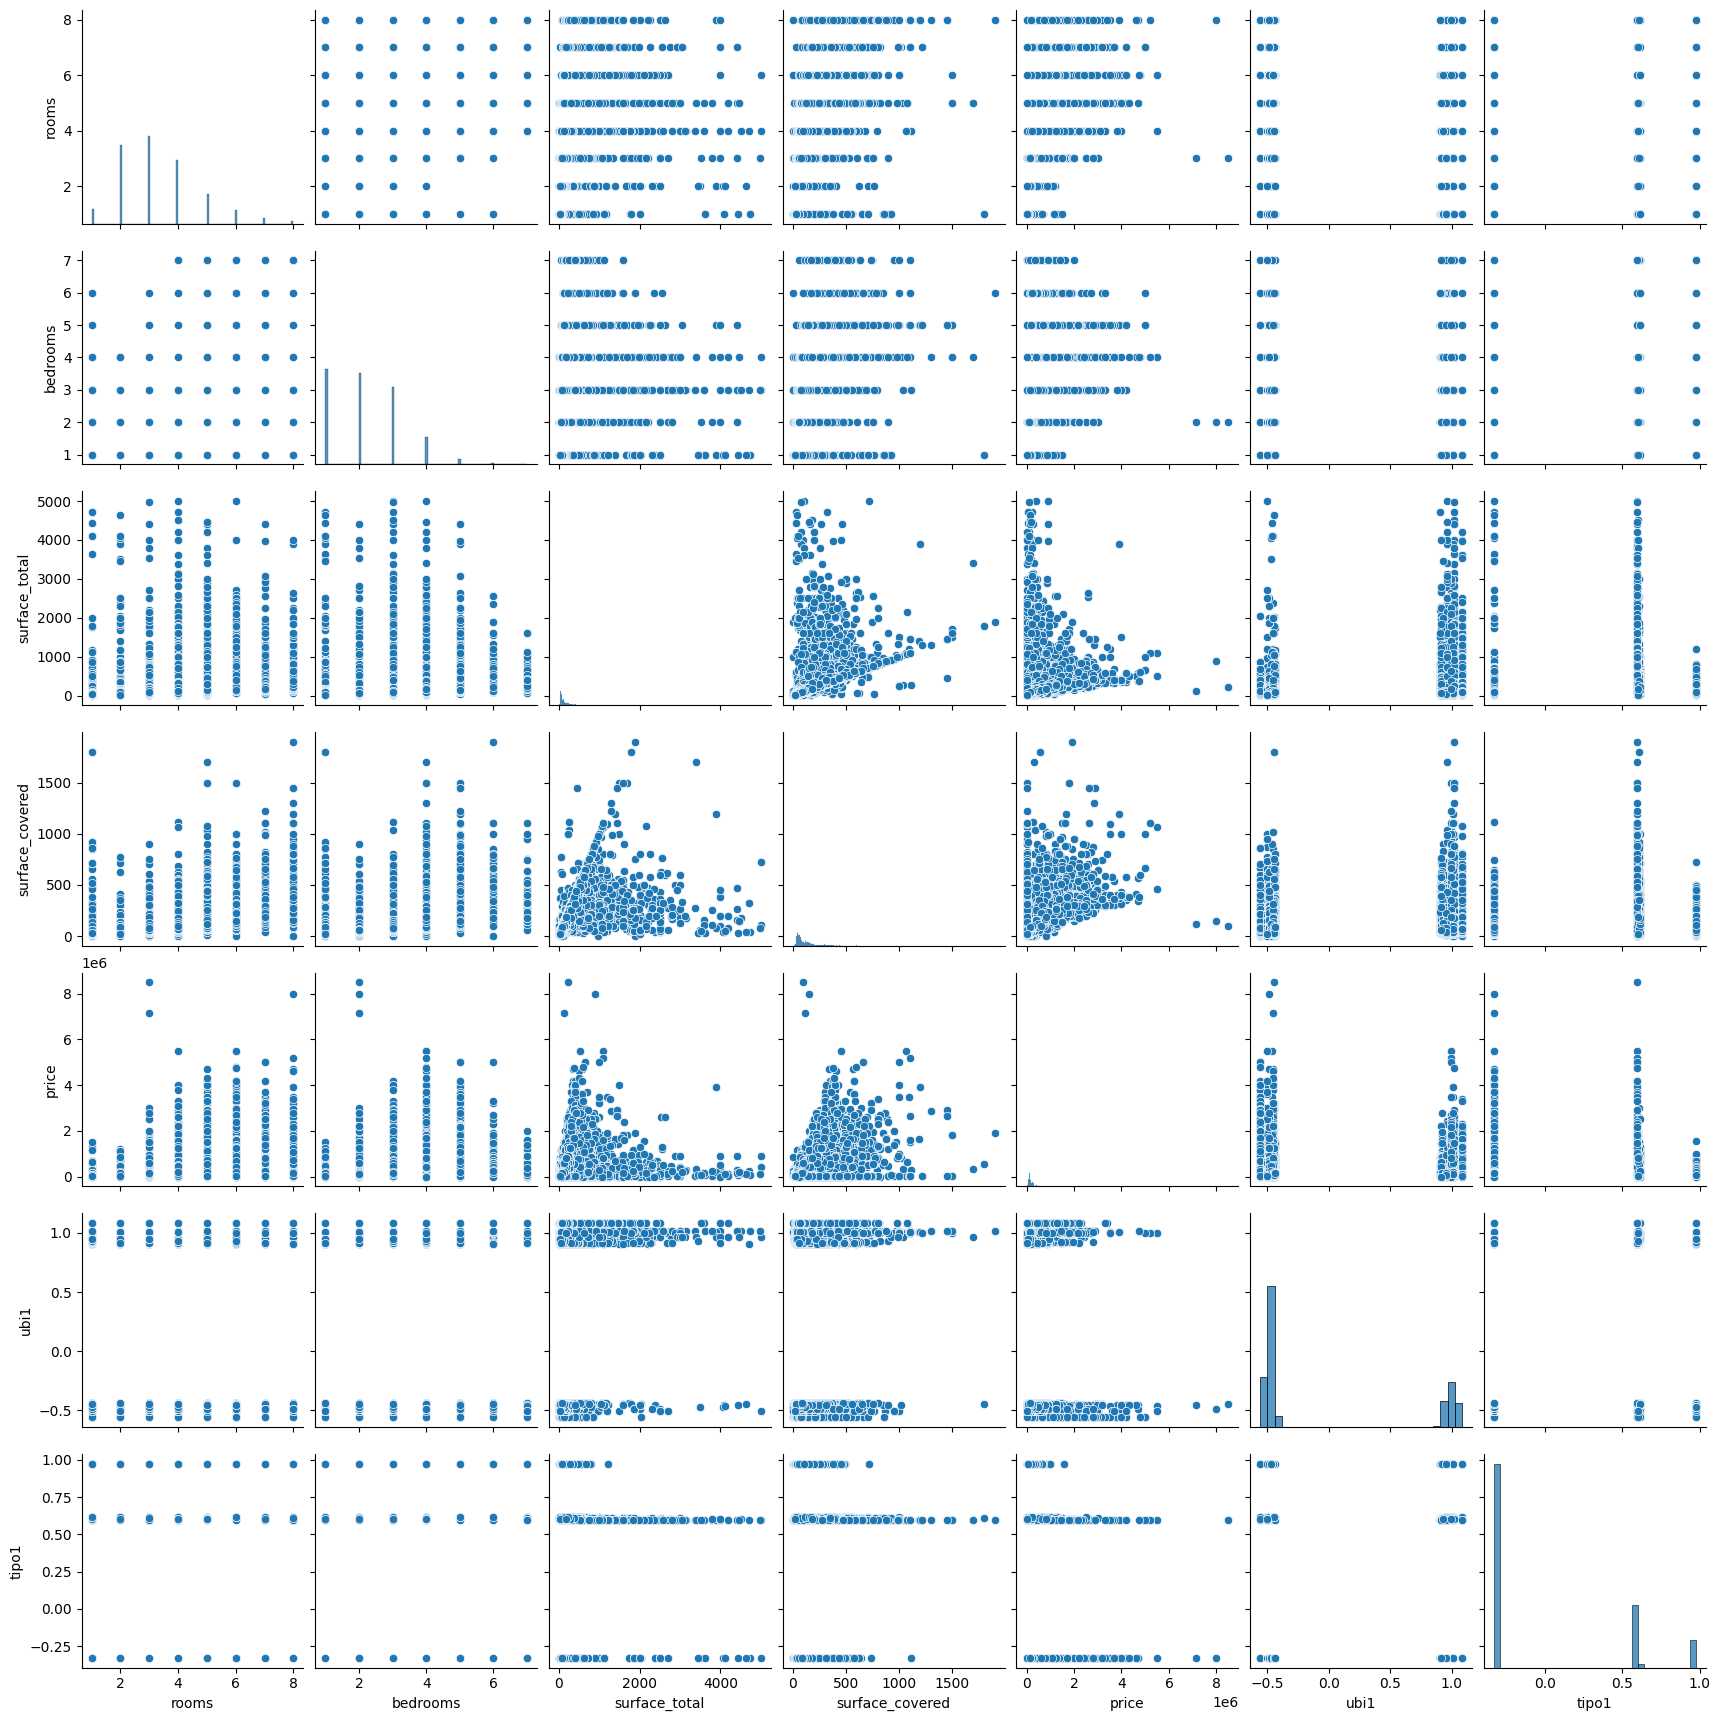

In [247]:
sns.pairplot(data_pairplot)

A partir del pairplot podemos observar la distribucion de los datos y relacion entre precio y la superficie cubierta y la superficie total.

## 2. CLUSTERING

Antes de avanzar con los modelos de predicción, haremos un clustering de los datos para ver como estan segmentados y poder hacer un paso más hacia el análisis detallado de nuestros datos

In [297]:
data_kmeans=data_nueva.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

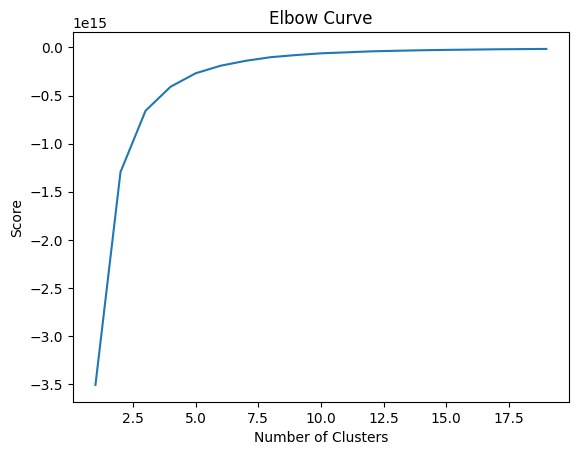

In [298]:
# evaluamos Kmeans para 20 distintas cantidad de clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data_kmeans).score(data_kmeans) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La mejor cantidad de cluster es en la cual se quiebra la curva de Elbow, por lo que la mejor cantidad de cluster es 4

In [299]:
# entrenamos Kmeans de 4 clusters y detrminamos los puntos centroides
kmeans4 = KMeans(n_clusters=4).fit(data_kmeans)
C = kmeans4.cluster_centers_
print(C)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-3.45478791e+01 -5.85096877e+01  3.53277096e+00  2.41658905e+00
   1.31486894e+02  9.95384922e+01  2.18342956e+05  1.30712455e-02
   1.78047856e-03 -1.57762182e-02  8.26705297e-03 -1.40258201e-02
   8.51616515e-03 -2.67870048e-03  8.14898307e-03 -3.33844106e-03
   1.24383959e-02 -1.56496254e-02 -7.74660284e-03  6.55893303e-03
   2.64080402e-03  4.59295686e-03  1.25294170e-02  3.00322907e-03
  -8.08797338e-03  9.11326069e-03 -2.73520463e-04  4.67331286e-02
   7.71712096e-03]
 [-3.45607439e+01 -5.85031994e+01  2.77847143e+00  1.76310830e+00
   1.01338107e+02  8.04728579e+01  8.48189635e+04 -3.26914078e-02
  -1.23876533e-02  4.54287747e-03 -1.92697069e-02  1.51734774e-02
   1.42692040e-03 -4.00741444e-03 -2.13009345e-02  9.72313135e-03
  -9.38866990e-03  1.56454459e-02  9.92742472e-03 -6.19838044e-03
  -1.51325678e-03  1.11615419e-03 -7.31167425e-03  6.56960949e-03
   7.82653698e-03 -3.43204421e-03 -1.19871838e-03 -5.73799666e-02
   2.55411867e-02]
 [-3.45343557e+01 -5.84951277e+01  5.2

In [300]:
#definimos cada cluster
labels = kmeans4.predict(data_kmeans)
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [301]:
# observamos que cantidad de datos hay en cada cluster
copy = pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo



,color,cantidad
0,red,37579
1,green,59428
2,blue,3933
3,cyan,13049


Podemos observar que los cluster RED y GREEN son lo que mas datos contienen, mientras el cluster BLUE es el que menos datos tiene.

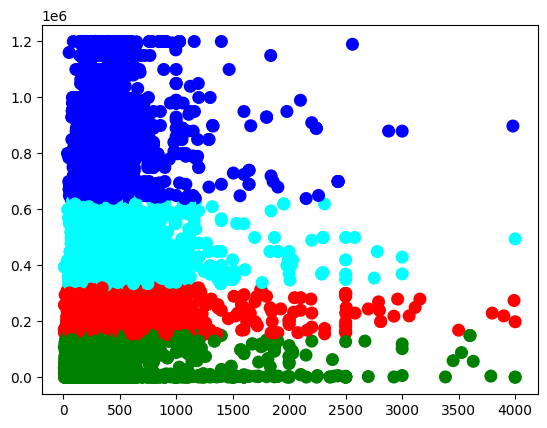

In [303]:
#Visualizamos los cluster a partir de las variables precios y superficie total
f1 = data_nueva['price'].values
f2 = data_nueva['surface_total'].values
plt.scatter(f2, f1, c=asignar, s=70)
plt.show()

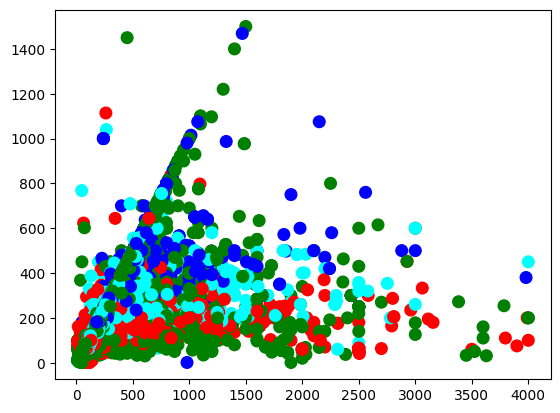

In [304]:
#Visualizamos los cluster a partir de las variables superficie cubierta y superficie total
f3 = data_nueva['surface_covered'].values
f2 = data_nueva['surface_total'].values
plt.scatter(f2, f3, c=asignar, s=70)
plt.show()

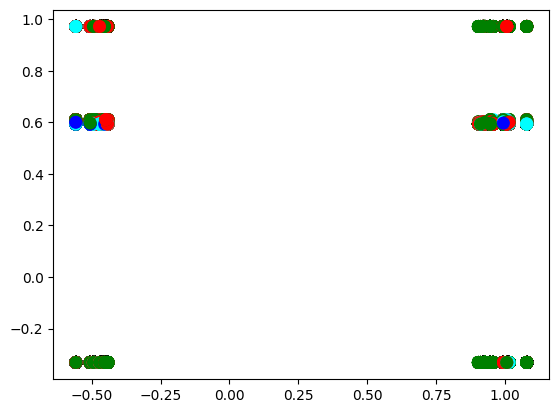

In [305]:
#Visualizamos los cluster a partir de las variables ubi1 y tipo1
f4 = data_nueva['ubi1'].values
f5 = data_nueva['tipo1'].values
plt.scatter(f4, f5, c=asignar, s=70)
plt.show()

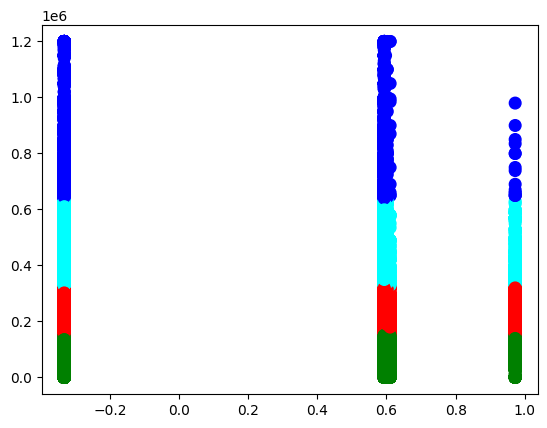

In [306]:
#Visualizamos los cluster a partir de las variables precio y tipo1
f1 = data_nueva['price'].values
f5 = data_nueva['tipo1'].values
plt.scatter(f5, f1, c=asignar, s=70)
plt.show()

A partir de las visualizaciones podemos observar que clustering segmentó los datos en función del
precio, el cluster AZUL es el de los precios mas altos, a partir de cerca de U$S 600.000 y tiene solo 3.993 datos.

Teniendo en cuenta ellos aplicamos un filtro - elevando ese piso de 600.000 a 700.000-; ya que al aplicar ese filtro es muy poco el porcentaje de datos que se pierde y puede mejorar el desempeño de nuestros modelos.

In [307]:
# Filtramos del datase
data_final= data_nueva.query('price<700000')
print(data_final.shape)

(111098, 29)


In [270]:
print(data_nueva.shape)
print(data_final.shape)
print("porcentaje de datos que descartamos del dataset antes del clustering", (100-(len(data_nueva)/len(data5)*100)))
print("porcentaje de datos que descartamos del dataset después del clustering", (100-len(data_final)/len(data5)*100))

(114986, 29)
(104582, 29)
porcentaje de datos que descartamos del dataset antes del clustering 39.20459352000677
porcentaje de datos que descartamos del dataset después del clustering 44.70539717451992


A partir del filtro por clustering solo perdemos un punto porcentual de nuestros datos pero mejora significativamente el desempeño de nuestro modelo.

import pandas as pd

In [5]:
import pandas as pd

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


In [9]:
def matriz_doble_filtro(dataframe,columna,nombre_columna):
  data_xxx=dataframe.copy()
  data_xx = pd.pivot_table(data_xxx, index=[columna], columns=["l2"], aggfunc= { 'l2': 'count'})
  data_nueva=np.zeros((len(data_xx.index)+1,len(data_xx.columns)+3))
  columnas=[nombre_columna]
  base_columnas=list(data_xx.columns)
  for z in base_columnas:
    filtro_columna=list(z)
    del filtro_columna[0]
    columnas.append(filtro_columna[0])
  columnas.append("TOTAL")
  columnas.append("%")
  data_nueva=pd.DataFrame(data_nueva, columns=columnas)
  data_nueva.iloc[0] = data_nueva.iloc[0].astype(str)
  for i in range(0,len(data_xx.index)):
    data_nueva.iloc[i,0]=data_xx.index[i]
    for j in range(0,len(data_xx.columns)):
      data_nueva.iloc[i,j+1]=data_xx.iloc[i,j]
  for i in range(0,len(data_xx.columns)):
    total=0
    for j in range(0,len(data_xx.index)):
      total= total + data_nueva.iloc[j,i+1]
    data_nueva.iloc[len(data_xx.index),0]="Total"
    data_nueva.iloc[len(data_xx.index),i+1]=total

  for j in range(0,len(data_nueva.index)):
    data_nueva.iloc[j,-2]=data_nueva.iloc[j,1]+data_nueva.iloc[j,2]

  data_nueva1=data_nueva.copy()
  data_nueva1 = data_nueva1.sort_values("TOTAL", ascending=False)
  data_nueva1=data_nueva1.reset_index()
  data_nueva1=data_nueva1.drop(['index'], axis=1)

  for p in range(0,(len(data_nueva.index))):
    data_nueva1.iloc[p,-1] = data_nueva1.iloc[p,-2]/data_nueva1.iloc[0,-2]
  return data_nueva1